In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from astropy.io import fits
from scipy.signal import find_peaks
from scipy.signal import resample

from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

C:\Users\Josh\AppData\Local\conda\conda\envs\astro\lib\site-packages\rascal\calibrator.py:36: TqdmExperimentalWarning:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)



In [2]:
spectrum = np.loadtxt("./A620EBA HgCal.mspec", delimiter=',')[:,1]

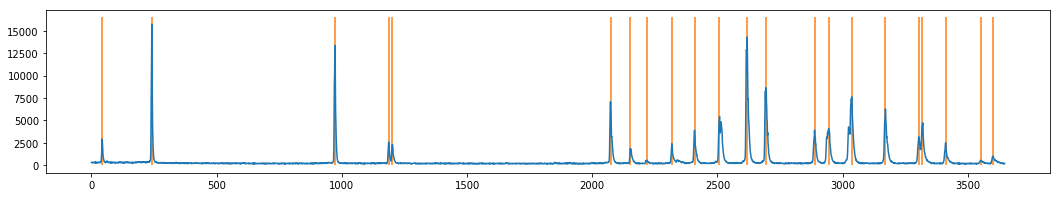

In [3]:
peaks, _ = find_peaks(spectrum, prominence=300, distance=15, threshold=None)
peaks_refined = refine_peaks(spectrum, peaks, window_width=3)

plt.figure(figsize=(18,3))
plt.plot(spectrum)
plt.vlines(peaks_refined,
              0,
              1.05*spectrum.max(),
              colors='C1')

In [4]:
c = Calibrator(peaks_refined, 
               num_pixels=len(spectrum),
               min_wavelength=4000.,
               max_wavelength=8750.)

c.add_atlas("Hg")
c.add_atlas("Ar", min_wavelength=6500) # Ignore bluer Argon lines

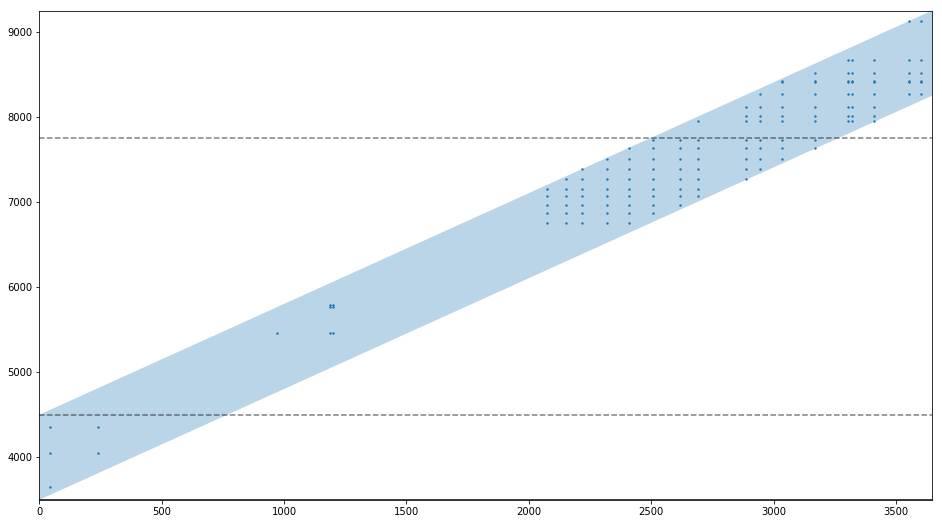

In [5]:
c.plot_search_space()

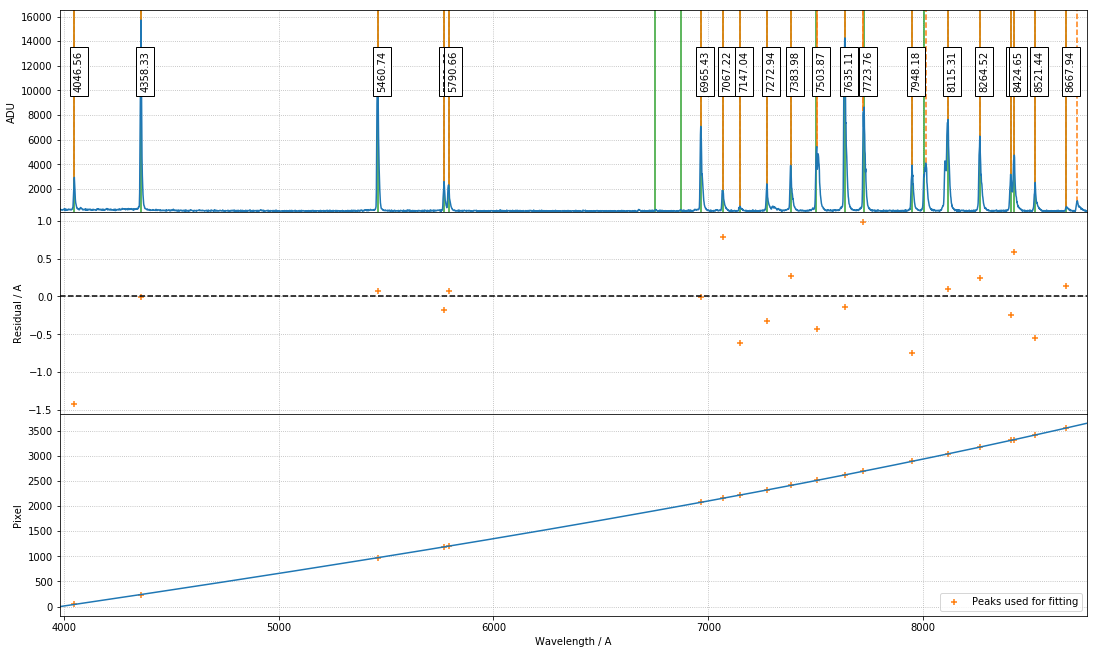

Stdev error: 0.4432096981536099 A


In [11]:
best_p = c.fit(max_tries=3000)
best_p, x_fit, y_fit = c.match_peaks_to_atlas(best_p, tolerance=5)
c.plot_fit(spectrum, best_p, plot_atlas=True, log_spectrum=False, tolerance=2)

fit_diff = c.polyval(best_p,x_fit)-y_fit

rms = np.sqrt(np.sum(fit_diff**2/len(x_fit)))

print("Stdev error: {} A".format(fit_diff.std()))

NB: The peak at 8718.34 is almost certainly the N=1 image of 4358 (Hg)

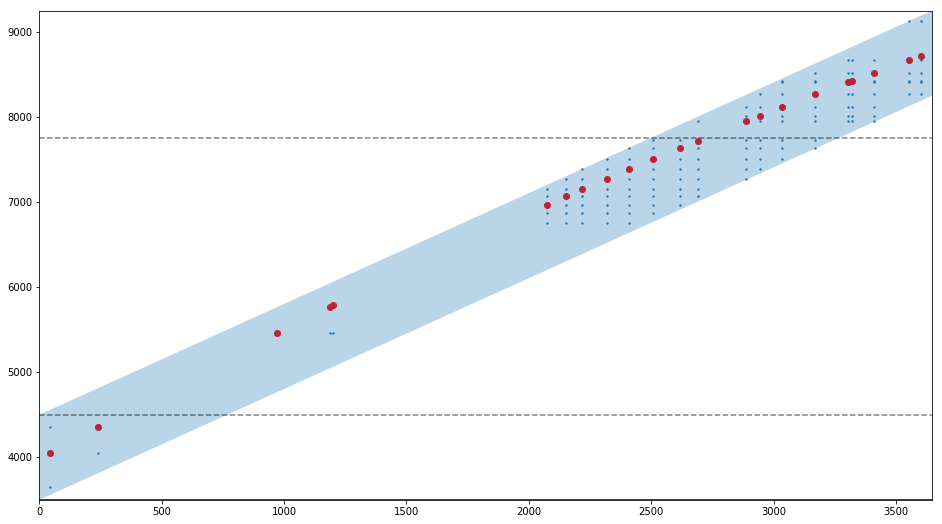

In [7]:
c.plot_search_space(best_p = best_p)